# Student Performance Analysis - Part 1: Data Loading & Exploration

In [13]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings

In [14]:
warnings.filterwarnings('ignore')

In [15]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

In [16]:
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

# Load Kazakhstan survey data

In [17]:
kz_data = pd.read_csv('/Users/kassi/Data Mining/Final/Code/data/orginal/kz_data_en.csv')
print(kz_data.shape)
kz_data.head()

(121, 32)


,timestamp,email,university,course_year,age,gender,living_situation,family_size,mother_education,father_education,family_income,financial_support,emotional_support,travel_time,study_hours_weekly,extra_courses,academic_failures,class_absences,internet_access,study_space_comfort,has_computer,health_status,physical_activity,sleep_hours,nursery_school,romantic_relationship,alcohol_consumption,academic_stress,peer_support,gpa,employment_status,column_30
0,11/21/2025 20:18:41,alinakurakbaeva.007@gmail.com,Академия гражданской авиации,2,18,Female,Rented apartment,5,Higher,Secondary,Above average,Partially,Never,30-60 min,>20,No,1.0,Sometimes,No,5,Yes,3,Sports,<5,Yes,No,Often,NaN,Never,3.00,Part-time (>20h),NaN
1,11/21/2025 21:04:21,NaN,AITU,Masters,20,Female,Rented apartment,6,Higher,Higher,Above average,Fully,Always,30-60 min,5-10,No,2.0,Often,Always,5,Yes,4,Music/Arts,5-6,Yes,Yes,Sometimes,NaN,Sometimes,3.93,Part-time (>20h),NaN
2,11/21/2025 22:43:22,NaN,Медицинский университет Астана (МУА),4,26,Female,Rented apartment,3,Vocational,Vocational,Average,Partially,Always,>60 min,10-20,No,2.0,Almost never,Always,2,Shared,3,No activity,5-6,NaN,Yes,Rarely,NaN,Sometimes,2.70,Part-time (>20h),NaN
3,11/21/2025 22:51:33,NaN,Казахско‑Британский технический университет (K...,4,21,Female,With parents,8,Vocational,Vocational,Average,Partially,Sometimes,>60 min,<5,No,NaN,Often,No,4,Yes,2,No activity,<5,No,No,Never,NaN,Rarely,2.00,Part-time (>20h),NaN
4,11/21/2025 23:15:59,NaN,Казахско‑Британский технический университет (K...,4,21,Female,Rented apartment,6,Higher,Higher,High,No,Never,15-30 min,5-10,No,2.0,Very often,Always,5,Yes,3,No activity,<5,No,No,Sometimes,NaN,Always,2.99,Part-time (>20h),NaN


In [18]:
for i, col in enumerate(kz_data.columns, 1):
    print(f"{i}. {col}")

1. timestamp
2. email
3. university
4. course_year
5. age
6. gender
7. living_situation
8. family_size
9. mother_education
10. father_education
11. family_income
12. financial_support
13. emotional_support
14. travel_time
15. study_hours_weekly
16. extra_courses
17. academic_failures
18. class_absences
19. internet_access
20. study_space_comfort
21. has_computer
22. health_status
23. physical_activity
24. sleep_hours
25. nursery_school
26. romantic_relationship
27. alcohol_consumption
28. academic_stress
29. peer_support
30. gpa
31. employment_status
32. column_30


In [19]:
print("\nData types:")
kz_data.dtypes


Data types:


timestamp                 object
email                     object
university                object
course_year               object
age                        int64
gender                    object
living_situation          object
family_size                int64
mother_education          object
father_education          object
family_income             object
financial_support         object
emotional_support         object
travel_time               object
study_hours_weekly        object
extra_courses             object
academic_failures        float64
class_absences            object
internet_access           object
study_space_comfort        int64
has_computer              object
health_status              int64
physical_activity         object
sleep_hours               object
nursery_school            object
romantic_relationship     object
alcohol_consumption       object
academic_stress          float64
peer_support              object
gpa                      float64
employment

In [20]:
kz_data.describe()

,age,family_size,academic_failures,study_space_comfort,health_status,academic_stress,gpa,column_30
count,121.000000,121.000000,104.000000,121.000000,121.000000,0.0,121.000000,0.0
mean,20.173554,5.743802,0.548077,3.925620,3.710744,NaN,3.102810,NaN
std,3.179826,2.403223,0.748848,1.017884,0.952523,NaN,0.718537,NaN
min,16.000000,2.000000,0.000000,1.000000,1.000000,NaN,0.000000,NaN
25%,19.000000,5.000000,0.000000,3.000000,3.000000,NaN,2.900000,NaN
50%,20.000000,5.000000,0.000000,4.000000,4.000000,NaN,3.200000,NaN
75%,21.000000,7.000000,1.000000,5.000000,4.000000,NaN,3.500000,NaN
max,50.000000,20.000000,2.000000,5.000000,5.000000,NaN,4.000000,NaN


In [21]:
print("\nMissing values:")
kz_data.isnull().sum()


Missing values:


timestamp                  0
email                    117
university                 0
course_year                0
age                        0
gender                     0
living_situation           0
family_size                0
mother_education           0
father_education           0
family_income              0
financial_support          0
emotional_support          0
travel_time                0
study_hours_weekly         0
extra_courses              0
academic_failures         17
class_absences             0
internet_access            0
study_space_comfort        0
has_computer               0
health_status              0
physical_activity          0
sleep_hours                0
nursery_school             6
romantic_relationship      0
alcohol_consumption        0
academic_stress          121
peer_support               0
gpa                        0
employment_status          1
column_30                121
dtype: int64

# Load foreign student dataset

In [22]:
foreign_data = pd.read_csv('/Users/kassi/Data Mining/Final/Code/data/orginal/student_portuguese.csv')
print(foreign_data.shape)
foreign_data.head()

(649, 34)


,student_id,school,sex,age,address_type,family_size,parent_status,mother_education,father_education,mother_job,father_job,school_choice_reason,guardian,travel_time,study_time,class_failures,school_support,family_support,extra_paid_classes,activities,nursery_school,higher_ed,internet_access,romantic_relationship,family_relationship,free_time,social,weekday_alcohol,weekend_alcohol,health,absences,grade_1,grade_2,final_grade
0,1,GP,F,18,Urban,Greater than 3,Apart,higher education,higher education,at_home,teacher,course,mother,15 to 30 min.,2 to 5 hours,0,yes,no,no,no,yes,yes,no,no,4,3,4,1,1,3,4,0,11,11
1,2,GP,F,17,Urban,Greater than 3,Living together,primary education (4th grade),primary education (4th grade),at_home,other,course,father,<15 min.,2 to 5 hours,0,no,yes,no,no,no,yes,yes,no,5,3,3,1,1,3,2,9,11,11
2,3,GP,F,15,Urban,Less than or equal to 3,Living together,primary education (4th grade),primary education (4th grade),at_home,other,other,mother,<15 min.,2 to 5 hours,0,yes,no,no,no,yes,yes,yes,no,4,3,2,2,3,3,6,12,13,12
3,4,GP,F,15,Urban,Greater than 3,Living together,higher education,5th to 9th grade,health,services,home,mother,<15 min.,5 to 10 hours,0,no,yes,no,yes,yes,yes,yes,yes,3,2,2,1,1,5,0,14,14,14
4,5,GP,F,16,Urban,Greater than 3,Living together,secondary education,secondary education,other,other,home,father,<15 min.,2 to 5 hours,0,no,yes,no,no,yes,yes,no,no,4,3,2,1,2,5,0,11,13,13


In [23]:
for i, col in enumerate(foreign_data, 1):
    print(f"{i}, {col}")

1, student_id
2, school
3, sex
4, age
5, address_type
6, family_size
7, parent_status
8, mother_education
9, father_education
10, mother_job
11, father_job
12, school_choice_reason
13, guardian
14, travel_time
15, study_time
16, class_failures
17, school_support
18, family_support
19, extra_paid_classes
20, activities
21, nursery_school
22, higher_ed
23, internet_access
24, romantic_relationship
25, family_relationship
26, free_time
27, social
28, weekday_alcohol
29, weekend_alcohol
30, health
31, absences
32, grade_1
33, grade_2
34, final_grade


In [24]:
foreign_data.dtypes

student_id                int64
school                   object
sex                      object
age                       int64
address_type             object
family_size              object
parent_status            object
mother_education         object
father_education         object
mother_job               object
father_job               object
school_choice_reason     object
guardian                 object
travel_time              object
study_time               object
class_failures            int64
school_support           object
family_support           object
extra_paid_classes       object
activities               object
nursery_school           object
higher_ed                object
internet_access          object
romantic_relationship    object
family_relationship       int64
free_time                 int64
social                    int64
weekday_alcohol           int64
weekend_alcohol           int64
health                    int64
absences                  int64
grade_1 

In [25]:
foreign_data.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
student_id,649.0,NaN,NaN,NaN,325.0,187.494444,1.0,163.0,325.0,487.0,649.0
school,649,2,GP,423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sex,649,2,F,383,NaN,NaN,NaN,NaN,NaN,NaN,NaN
age,649.0,NaN,NaN,NaN,16.744222,1.218138,15.0,16.0,17.0,18.0,22.0
address_type,649,2,Urban,452,NaN,NaN,NaN,NaN,NaN,NaN,NaN
family_size,649,2,Greater than 3,457,NaN,NaN,NaN,NaN,NaN,NaN,NaN
parent_status,649,2,Living together,569,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mother_education,649,5,5th to 9th grade,186,NaN,NaN,NaN,NaN,NaN,NaN,NaN
father_education,649,5,5th to 9th grade,209,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mother_job,649,5,other,258,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [26]:
foreign_data.isnull().sum()

student_id               0
school                   0
sex                      0
age                      0
address_type             0
family_size              0
parent_status            0
mother_education         0
father_education         0
mother_job               0
father_job               0
school_choice_reason     0
guardian                 0
travel_time              0
study_time               0
class_failures           0
school_support           0
family_support           0
extra_paid_classes       0
activities               0
nursery_school           0
higher_ed                0
internet_access          0
romantic_relationship    0
family_relationship      0
free_time                0
social                   0
weekday_alcohol          0
weekend_alcohol          0
health                   0
absences                 0
grade_1                  0
grade_2                  0
final_grade              0
dtype: int64

# Compare Datasets

In [27]:
print("Dataset Comparison:")
print(f"Kazakhstan: {kz_data.shape[0]} rows, {kz_data.shape[1]} columns")
print(f"Foreign: {foreign_data.shape[0]} rows, {foreign_data.shape[1]} columns")

Dataset Comparison:
Kazakhstan: 121 rows, 32 columns
Foreign: 649 rows, 34 columns


In [28]:
kz_cols = set(kz_data.columns)
foreign_cols = set(foreign_data.columns)

print("\nCommon columns:")
common_cols = kz_cols.intersection(foreign_cols)
print(common_cols)

print("\nKazakhstan-only columns:")
print(kz_cols - foreign_cols)

print("\nForeign-only columns:")
print(foreign_cols - kz_cols)



Common columns:
{'father_education', 'mother_education', 'family_size', 'age', 'romantic_relationship', 'internet_access', 'nursery_school', 'travel_time'}

Kazakhstan-only columns:
{'employment_status', 'column_30', 'gender', 'class_absences', 'living_situation', 'alcohol_consumption', 'study_hours_weekly', 'health_status', 'course_year', 'study_space_comfort', 'financial_support', 'emotional_support', 'email', 'physical_activity', 'academic_stress', 'extra_courses', 'university', 'gpa', 'sleep_hours', 'family_income', 'has_computer', 'timestamp', 'academic_failures', 'peer_support'}

Foreign-only columns:
{'school_choice_reason', 'weekday_alcohol', 'school', 'activities', 'free_time', 'final_grade', 'parent_status', 'class_failures', 'health', 'absences', 'higher_ed', 'address_type', 'extra_paid_classes', 'grade_2', 'grade_1', 'study_time', 'school_support', 'student_id', 'guardian', 'father_job', 'family_support', 'social', 'sex', 'family_relationship', 'weekend_alcohol', 'mother_j

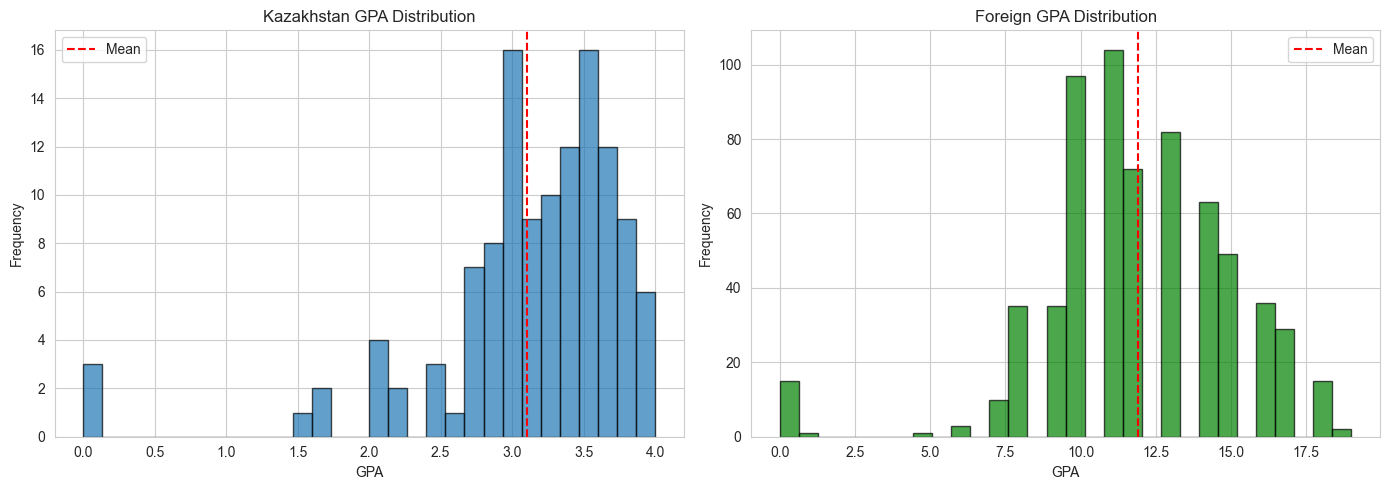

In [30]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(kz_data['gpa'].dropna(), bins=30, edgecolor='black', alpha=0.7)
axes[0].set_title('Kazakhstan GPA Distribution')
axes[0].set_xlabel('GPA')
axes[0].set_ylabel('Frequency')
axes[0].axvline(kz_data['gpa'].mean(), color='red', linestyle='--', label='Mean')
axes[0].legend()

axes[1].hist(foreign_data['final_grade'].dropna(), bins=30, edgecolor='black', alpha=0.7, color='green')
axes[1].set_title('Foreign GPA Distribution')
axes[1].set_xlabel('GPA')
axes[1].set_ylabel('Frequency')
axes[1].axvline(foreign_data['final_grade'].mean(), color='red', linestyle='--', label='Mean')
axes[1].legend()

plt.tight_layout()
plt.savefig('/Users/kassi/Data Mining/Final/Code/figure/data_loading/gpa_distribution_comparison.png', dpi=300, bbox_inches='tight')
plt.show()